## The Stock Market Data
We will use the "The Stock Market dataset” from the book “An Introduction to Statistical Learning, with applications in R”, G. James, D. Witten,  T. Hastie and R. Tibshirani, Springer, 2013. There is a package in R called ISLR with this dataset included.

Daily percentage returns for the S&P 500 stock index between 2001 and 2005 (source: raw values of the S&P 500 were obtained from Yahoo Finance and then converted to percentages and lagged).

The stock market data includes 1250 examples of stock market information, each with 9 features: Year, Lag1, Lag2, Lag3, Lag4, Lag5, Volume, Today and Direction. Direction is the class feature with two possible outcomes: up or down.

### Load data

In [42]:
library(ISLR)

names(Smarket)
summary(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [3]:
?Smarket

A typical predictor has the form response ~ terms where response is the (numeric) response vector and terms is a series of terms which specifies a linear predictor for response. For binomial and quasibinomial families the response can also be specified as a factor (when the first level denotes failure and all others success) or as a two-column matrix with the columns giving the numbers of successes and failures. A terms specification of the form first + second indicates all the terms in first together with all the terms in second with any duplicates removed.

In [4]:
class(Smarket$Direction)
levels(Smarket$Direction)

[1] "factor"

[1] "Down" "Up"

### Analyze data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



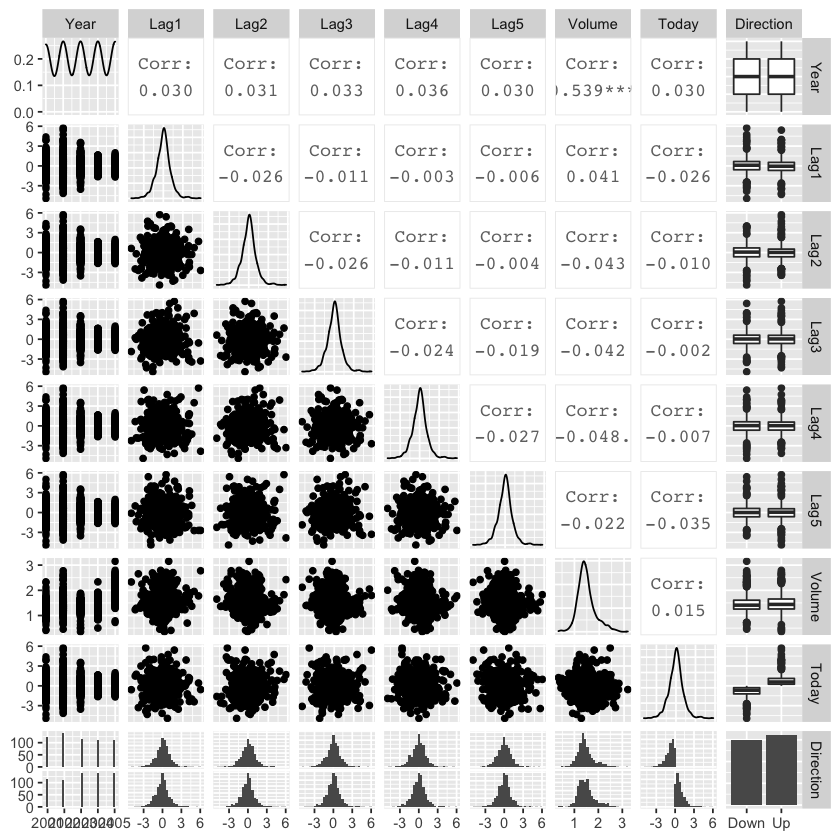

In [9]:
library(GGally)

ggpairs(Smarket)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



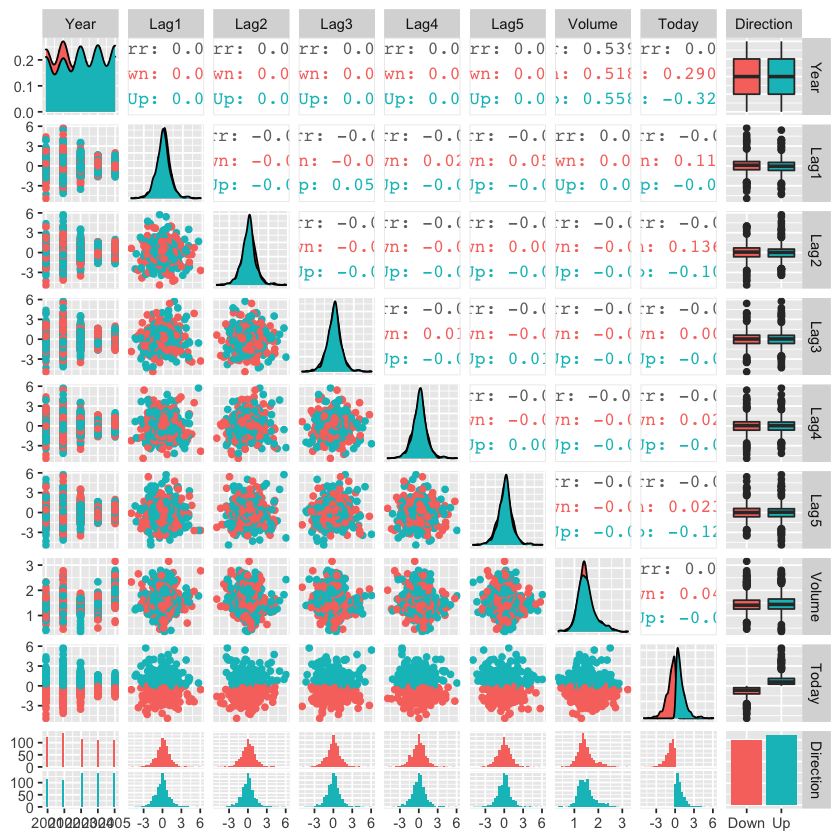

In [10]:
ggpairs(Smarket, aes(col=Direction))

In [26]:
# Direction is derive from Today
cor(as.numeric(Smarket$Direction),Smarket$Today)

[1] 0.7305629

In [12]:
cor(Smarket[,-9]) # Note that Volume has some correlation with Year...

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


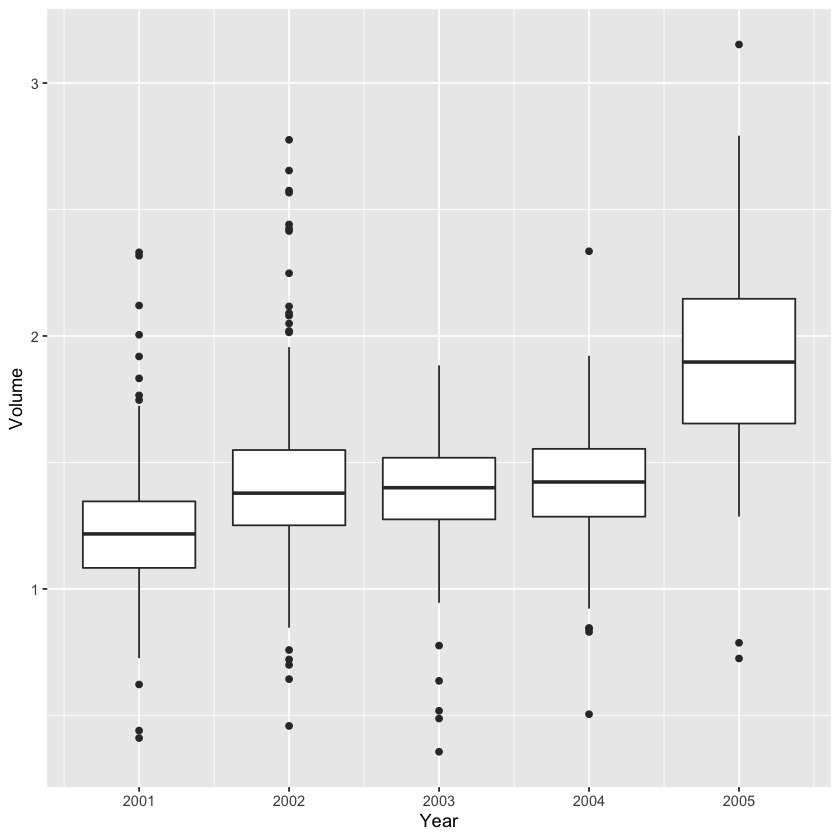

In [25]:
ggplot(Smarket, aes(x=Year, group=Year, y=Volume)) + geom_boxplot()

### Logistic regression - quick and nasty

In [27]:
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [28]:
glm.probs <- predict(glm.fit, type="response") 
glm.probs

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10        11        12        13        14        15        16 
0.5176135 0.4888378 0.4965211 0.5197834 0.5183031 0.4963852 0.4864892 0.5153660 
       17        18        19        20        21        22        23        24 
0.5053976 0.5319322 0.5167163 0.4983272 0.5229797 0.5221677 0.5340639 0.4920971 
       25        26        27        28        29        30        31        32 
0.5008751 0.5191211 0.4919679 0.5373796 0.5571306 0.5574363 0.5307063 0.5083437 
       33        34        35        36        37        38        39        40 
0.4714015 0.4949516 0.5471346 0.5260910 0.5203319 0.4902306 0.4760375 0.4850667 
       41        42        43        44        45        46        47        48 
0.4979462 0.5535387 0.6176442 0.5284518 0.5301251 0.5153681 0.5355161 0.4945795 
       49        50        51        52        53        54        55        56 
0.5249470 0.5735593 0.5455080 0.4765992 0.4531691 0.4544318 0.5379025 0.5591742 
       57        58        59        60        61        62        63        64 
0.4991918 0.5219328 0.5861722 0.5560757 0.4289095 0.4896402 0.5133387 0.4601776 
       65        66        67        68        69        70        71        72 
0.4962909 0.4847361 0.4972136 0.5013727 0.4537779 0.4608736 0.5284874 0.5541953 
       73        74        75        76        77        78        79        80 
0.5580780 0.4900787 0.4795402 0.4708035 0.5026603 0.4960765 0.5020786 0.5402471 
       81        82        83        84        85        86        87        88 
0.4971418 0.4894053 0.5092301 0.5158414 0.5121983 0.5110322 0.4992040 0.4979377 
       89        90        91        92        93        94        95        96 
0.4626107 0.4781316 0.5076532 0.4834586 0.5076192 0.5437706 0.5200800 0.5139898 
       97        98        99       100       101       102       103       104 
0.5265218 0.5379726 0.5111662 0.4800603 0.4794640 0.4756823 0.5139061 0.5123646 
      105       106       107       108       109       110       111       112 
0.5059202 0.5255465 0.5096551 0.5209010 0.5503284 0.5454886 0.5126250 0.4992420 
      113       114       115       116       117       118       119       120 
0.4877559 0.4895564 0.5159692 0.5301499 0.5199546 0.5171795 0.4914312 0.5169617 
      121       122       123       124       125       126       127       128 
0.4918327 0.4835776 0.5302389 0.5613952 0.5149406 0.5204423 0.5258673 0.4652345 
      129       130       131       132       133       134       135       136 
0.4681630 0.5195629 0.5106937 0.5171932 0.5106220 0.5060068 0.5383249 0.5549366 
      137       138       139       140       141       142       143       144 
0.4959159 0.4643444 0.4838769 0.5011806 0.5049573 0.5038605 0.5003239 0.5078093 
      145       146       147       148       149       150       151       152 
0.5258066 0.5093433 0.5313691 0.5212320 0.4837498 0.4858783 0.5042435 0.5235971 
      153       154       155       156       157       158       159       160 
0.5069808 0.5259487 0.4998119 0.5114614 0.5053207 0.4938316 0.4720827 0.4828294 
      161       162       163       164       165       166       167       168 
0.5409544 0.5398367 0.5501315 0.5024233 0.4939689 0.5121701 0.5527710 0.5745127 
      169       170       171       172       173       174       175       176 
0.5134565 0.6178172 0.5779814 0.5586072 0.5973840 0.5948993 0.4627514 0.4493427 
      177       178       179       180       181       182       183       184 
0.5184195 0.5092985 0.4822288 0.4935678 0.4995467 0.4824233 0.5149404 0.5199915 
      185       186       187       188       189       190       191       192 
0.5222882 0.5336493 0.4741573 0.4711892 0.5100753 0.5197549 0.5064399 0.5464963 
      193       194       195       196       197       198       199       200 
0.5454220 0.5084035 0.4684574 0.5001289

In [29]:
glm.pred <- ifelse(glm.probs>0.5,"Up","Down")
glm.pred

1      2      3      4      5      6      7      8      9     10     11 
  "Up" "Down" "Down"   "Up"   "Up"   "Up" "Down"   "Up"   "Up" "Down" "Down" 
    12     13     14     15     16     17     18     19     20     21     22 
  "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down"   "Up"   "Up" 
    23     24     25     26     27     28     29     30     31     32     33 
  "Up" "Down"   "Up"   "Up" "Down"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" 
    34     35     36     37     38     39     40     41     42     43     44 
"Down"   "Up"   "Up"   "Up" "Down" "Down" "Down" "Down"   "Up"   "Up"   "Up" 
    45     46     47     48     49     50     51     52     53     54     55 
  "Up"   "Up"   "Up" "Down"   "Up"   "Up"   "Up" "Down" "Down" "Down"   "Up" 
    56     57     58     59     60     61     62     63     64     65     66 
  "Up" "Down"   "Up"   "Up"   "Up" "Down" "Down"   "Up" "Down" "Down" "Down" 
    67     68     69     70     71     72     73     74     75     76     77 
"Down"   "Up" "Down" "Down"   "Up"   "Up"   "Up" "Down" "Down" "Down"   "Up" 
    78     79     80     81     82     83     84     85     86     87     88 
"Down"   "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down" "Down" 
    89     90     91     92     93     94     95     96     97     98     99 
"Down" "Down"   "Up" "Down"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" 
   100    101    102    103    104    105    106    107    108    109    110 
"Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" 
   111    112    113    114    115    116    117    118    119    120    121 
  "Up" "Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down"   "Up" "Down" 
   122    123    124    125    126    127    128    129    130    131    132 
"Down"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up" 
   133    134    135    136    137    138    139    140    141    142    143 
  "Up"   "Up"   "Up"   "Up" "Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up" 
   144    145    146    147    148    149    150    151    152    153    154 
  "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up" 
   155    156    157    158    159    160    161    162    163    164    165 
"Down"   "Up"   "Up" "Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down" 
   166    167    168    169    170    171    172    173    174    175    176 
  "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down" 
   177    178    179    180    181    182    183    184    185    186    187 
  "Up"   "Up" "Down" "Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down" 
   188    189    190    191    192    193    194    195    196    197    198 
"Down"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" "Down"   "Up"   "Up" "Down" 
   199    200    201    202    203    204    205    206    207    208    209 
"Down"   "Up"   "Up"   "Up" "Down" "Down" "Down" "Down"   "Up"   "Up"   "Up" 
   210    211    212    213    214    215    216    217    218    219    220 
  "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down"   "Up" 
   221    222    223    224    225    226    227    228    229    230    231 
  "Up"   "Up" "Down"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up"   "Up" 
   232    233    234    235    236    237    238    239    240    241    242 
  "Up"   "Up" "Down" "Down" "Down"   "Up"   "Up" "Down" "Down" "Down" "Down" 
   243    244    245    246    247    248    249    250    251    252    253 
  "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" 
   254    255    256    257    258    259    260    261    262    263    264 
  "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" 
   265    266    267    268    269    270    271    272    273    274    275 
  "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down" "Down"   "Up"   "Up"   "Up" 
   276    277    278    279    280    281    282    283    284    285    286 
  "Up"   "Up"   "Up"   "Up"

In [30]:
table(glm.pred,Smarket$Direction)
mean(glm.pred==Smarket$Direction)

        
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

### Logistic regression - correct version

In [36]:
# Make training and test set
train <- (Smarket$Year < 2005)
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket[train,], family=binomial)
glm.fit


Call:  glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket[train, ])

Coefficients:
(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5  
   0.191213    -0.054178    -0.045805     0.007200     0.006441    -0.004223  
     Volume  
  -0.116257  

Degrees of Freedom: 997 Total (i.e. Null);  991 Residual
Null Deviance:	    1383 
Residual Deviance: 1381 	AIC: 1395

In [32]:
glm.probs <- predict(glm.fit,newdata=Smarket[!train,], type="response") 
glm.pred <- ifelse(glm.probs>0.5,"Up","Down")
Direction.2005 <- Smarket$Direction[!train]
table(glm.pred,Direction.2005) # Overfitting!
mean(glm.pred==Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

### Logistic regression - smaller model

In [38]:
glm.fit <- glm(Direction~Lag1+Lag2, data=Smarket[train,], family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Smarket[train, 
    ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3


In [39]:
glm.probs <- predict(glm.fit,newdata=Smarket[!train,],type="response") 
glm.pred <- ifelse(glm.probs > 0.5,"Up","Down")
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

### Logistic regression - Using caret...

In [40]:
require(caret)
glmFit <- train(Smarket[train,-9], y = Smarket[train,9], method = "glm", preProcess = c("center", "scale"),
                tuneLength = 10, control=glm.control(maxit=1500), trControl = trainControl(method = "cv"))
glmFit

Loading required package: caret

Loading required package: lattice

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Generalized Linear Model 

998 samples
  8 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 898, 897, 898, 898, 898, 899, ... 
Resampling results:

  Accuracy   Kappa    
  0.9959899  0.9919776


In [41]:
require(caret)
glmFit <- train(Smarket[train,-8:-9], y = Smarket[train,9], method = "glm", preProcess = c("center", "scale"),
                tuneLength = 10, control=glm.control(maxit=500), trControl = trainControl(method = "cv"))
glmFit

Generalized Linear Model 

998 samples
  7 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 898, 898, 898, 898, 898, 898, ... 
Resampling results:

  Accuracy   Kappa     
  0.5151212  0.02712558


## Exercise
Using the breast cancer dataset (all data, not only training) perform 10 fold-cv with logistic regression.